This exercise involves implementing the Particle Swarm Optimization (PSO) algorithm for unconstrained nonlinear optimization on continuous variables. PSO uses a population of particles that move in the search space, being influenced by the best individual and global positions. The updating of positions is determined by factors of inertia, cognitive and social learning. The objective is to find the optimal solution throughout the iterations, exploring the search space collaboratively.


To solve this problem, the first step was to import the libraries that will be used to assist in the development of the exercise.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Below are the functions used to solve the problem:


1. peaks: Returns the Peaks function
2. rastrigin: Returns the Rastrigin function
3. PSO: Main function of the exercise, its parameters are the function to be used between peaks and rastringin (f), the limits of the decision variables (Xmin and Xmax), the population size (N), the learning factors ( c1 and c2) and the maximum number of iteration (maxiter). This function initializes the population and is responsible for updating the positions and velocities of the particles in each iteration, returning the best individual positions (P) and the best global position (G).

In [ ]:
def peaks(x):
  return 3*(1-x[0])**2 * np.exp(-(x[0]**2) - (x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2 - x[1]**2) - 1/3 * np.exp(-(x[0]+1)**2 - x[1]**2)

def rastrigin(x):
  return 20 + x[0]**2 - 10*np.cos(2*np.pi*x[0]) + x[1]**2 - 10*np.cos(2*np.pi*x[1])

def PSO(f, Xmin, Xmax, N, W, C1, C2, maxiter):

  Vmax = 1.5

  V = np.random.uniform(-Vmax, Vmax, (N, len(Xmin)))

  # Inicialização das partículas
  X = np.random.uniform(Xmin, Xmax, (N, len(Xmin)))
  P = X.copy()
  G = X[np.argmin(f(X))]

  # Iterações
  for t in range(maxiter):
    # Atualização das velocidades
    for i in range(N):
      for j in range(len(Xmin)):
        P1 = np.random.uniform(0, 1)
        P2 = np.random.uniform(0, 1)
        v_ij = W*V[i, j] + C1*P1*(P[i, j] - X[i, j]) + C2*P2*(G[j] - X[i, j])
        # Truncamento da velocidade
        if v_ij > Vmax:
          v_ij = Vmax
        elif v_ij < -Vmax:
          v_ij = -Vmax
        V[i, j] = v_ij

    # Atualização das posições
    X = X + V

    # Atualização das melhores posições conhecidas
    for i in range(N):
      if f(X[i]) < f(P[i]):
        P[i] = X[i]
      if f(P[i]) < f(G):
        G = P[i]

  return X, P, G

Below are the functions dedicated to the Plot of each case (Peaks and Rastrigin), as the code used for the plot was the same for both cases, in order to reduce the number of lines and consequently simplify understanding, responsible functions were created for this and When plotting to analyze the result, the functions in question are called passing the specific parameters for each case

In [ ]:
def plot_contour(problem, Xmin, Xmax, title):
    x = np.linspace(Xmin[0], Xmax[0], 100)
    y = np.linspace(Xmin[1], Xmax[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = problem([X[i, j], Y[i, j]])

    plt.contour(X, Y, Z, levels=20, cmap='viridis')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')

def plot_pso_path(X, P, G, title):
    plt.scatter(P[:, 0], P[:, 1], color='orange', label='Melhor Partícula')
    plt.scatter(X[:, 0], X[:, 1], color='blue', label='Posição Atual')
    plt.scatter(G[0], G[1], color='red', label='Melhor Global')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()

Now that all functions have been declared, what remains is to define the parameters for each case and make function calls correctly.

Caso Peaks:

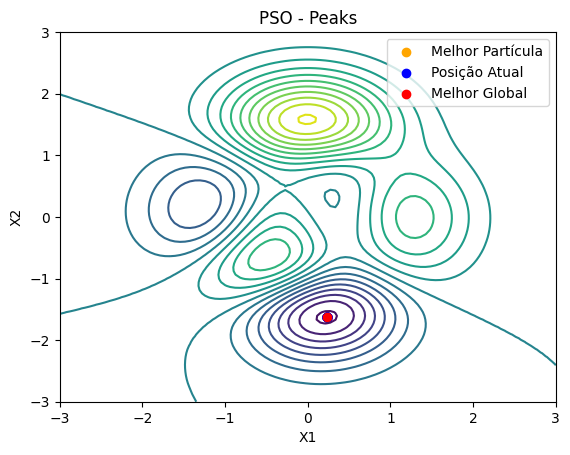

In [ ]:
Xmin_peaks = [-3, -3]
Xmax_peaks = [3, 3]
N_peaks = 50
W_peaks = 0.7
C1_peaks = 0.7
C2_peaks = 0.7
maxiter_peaks = 100

X_peaks, P_peaks, G_peaks = PSO(peaks, Xmin_peaks, Xmax_peaks, N_peaks, W_peaks, C1_peaks, C2_peaks, maxiter_peaks)

plt.figure()
plot_contour(peaks, Xmin_peaks, Xmax_peaks, 'Função Peaks')
plot_pso_path(X_peaks, P_peaks, G_peaks, 'PSO - Peaks')

plt.show()

Caso Rastrigin:

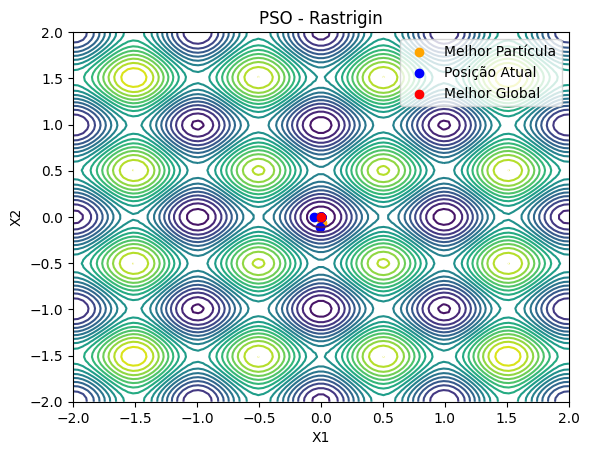

In [ ]:
Xmin_rastrigin = [-2, -2]
Xmax_rastrigin = [2, 2]
N_rastrigin = 50
W_rastrigin = 0.7
C1_rastrigin = 0.7
C2_rastrigin = 0.7
maxiter_rastrigin = 100

X_rastrigin, P_rastrigin, G_rastrigin = PSO(rastrigin, Xmin_rastrigin, Xmax_rastrigin, N_rastrigin, W_rastrigin, C1_rastrigin, C2_rastrigin, maxiter_rastrigin)

plt.figure()
plot_contour(rastrigin, Xmin_rastrigin, Xmax_rastrigin, 'Função Rastrigin')
plot_pso_path(X_rastrigin, P_rastrigin, G_rastrigin, 'PSO - Rastrigin')

plt.show()